# EDA and research analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

## Для начала получим общую информацию о данных в датасете

In [2]:
data_info = df.info()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Получим основные статистические показатели

In [3]:
stats_summary = df.describe()
stats_summary

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Выполним проверку на пустые значения и выведем их типы

In [4]:
data_types = df.dtypes
missing_values = df.isnull().sum()

data_overview = pd.DataFrame({"Data Type": data_types, "Missing Values": missing_values})
print(data_overview)

                 Data Type  Missing Values
Unnamed: 0           int64               0
track_id            object               0
artists             object               1
album_name          object               1
track_name          object               1
popularity           int64               0
duration_ms          int64               0
explicit              bool               0
danceability       float64               0
energy             float64               0
key                  int64               0
loudness           float64               0
mode                 int64               0
speechiness        float64               0
acousticness       float64               0
instrumentalness   float64               0
liveness           float64               0
valence            float64               0
tempo              float64               0
time_signature       int64               0
track_genre         object               0


### Общая информация

В наборе 114,000 записей и 21 столбец

Столбцы включают информацию о треках, таких как track_id, artists, album_name, track_name, а также различные аудио-характеристики, такие как danceability, energy, loudness и другие.

Типы данных: int, float, string и boolean.

### Основная статистика

1. Популярность треков (popularity) варьируется от 0 до 100, со средним значением около 33.
2. Продолжительность треков (duration_ms) в среднем составляет около 228,000 мс (или около 3.8 минут).
3. Средняя танцевальность (danceability) составляет около 0.57, а средняя энергичность (energy) — около 0.64.
4. Средняя громкость (loudness) составляет около -8.25 дБ.
5. Средний темп (tempo) составляет около 122 BPM (ударов в минуту).

## Визуализация

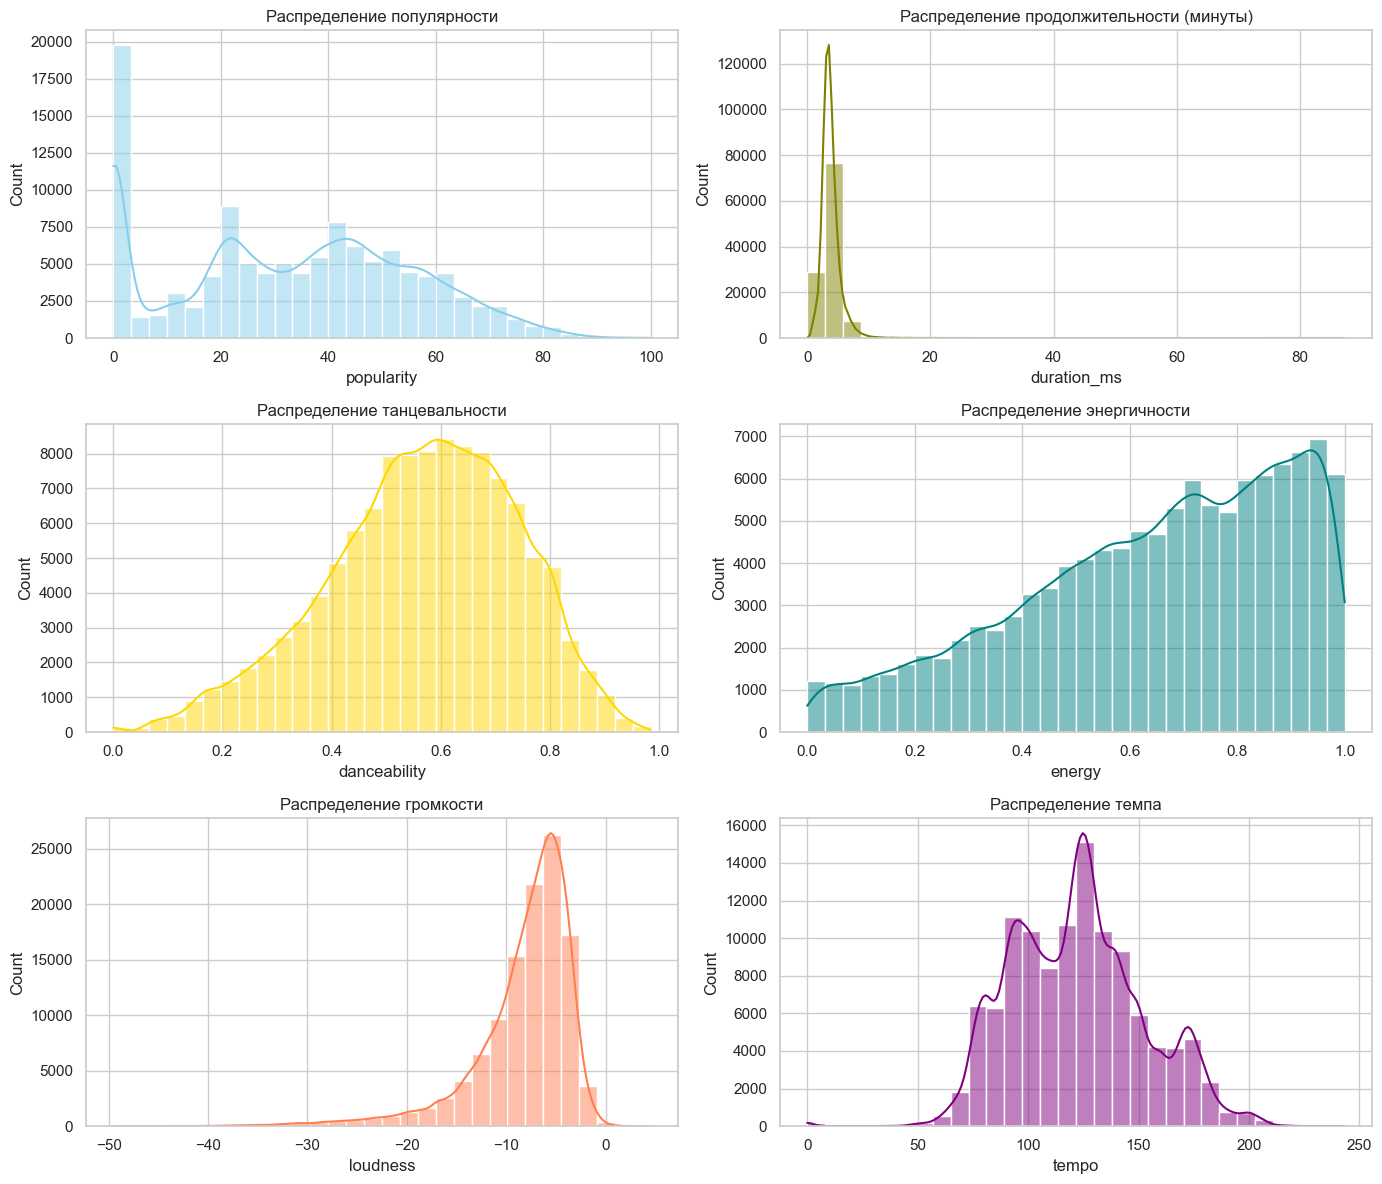

In [5]:
import seaborn as sns

# Настройка стиля графиков
sns.set(style="whitegrid")

# Построение гистограмм для ключевых переменных
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Гистограмма популярности
sns.histplot(df['popularity'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Распределение популярности')

# Гистограмма продолжительности
sns.histplot(df['duration_ms'] / 60000, bins=30, kde=True, ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Распределение продолжительности (минуты)')

# Гистограмма танцевальности
sns.histplot(df['danceability'], bins=30, kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Распределение танцевальности')

# Гистограмма энергичности
sns.histplot(df['energy'], bins=30, kde=True, ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Распределение энергичности')

# Гистограмма громкости
sns.histplot(df['loudness'], bins=30, kde=True, ax=axes[2, 0], color='coral')
axes[2, 0].set_title('Распределение громкости')

# Гистограмма темпа
sns.histplot(df['tempo'], bins=30, kde=True, ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Распределение темпа')

plt.tight_layout()
plt.show()

track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre

Гистограммы показывают распределения популярности, продолжительности, танцевальности, энергичности, громкости и темпа.

Популярность имеет бимодальное распределение с пиками на низких и высоких значениях.

Продолжительность треков в основном сосредоточена в диапазоне от 2 до 4 минут.

Танцевальность и энергичность имеют нормальное распределение.

Громкость имеет нормальное распределение с пиком около -6 дБ.

Темп имеет нормальное распределение с пиком около 120 BPM.

## Гипотезы

### Энергичность и танцевальность:



Гипотеза: Треки с высокой энергичностью и танцевальностью могут быть более популярными, так как они чаще вызывают положительные эмоции и желание слушать их снова.

Поля: energy, danceability

### Громкость и темп:

Гипотеза: Треки с оптимальной громкостью и темпом могут быть более привлекательными для слушателей, что повышает их популярность.

Поля: loudness, tempo


### Позитивность (valence)

Гипотеза: Треки с высокой валентностью (более позитивные) могут быть более популярными, так как они вызывают положительные эмоции.

Поля: valence

### Акустичность и инструментальность

Гипотеза: Треки с определенным уровнем акустичности и инструментальности могут быть более популярными в зависимости от жанра и предпочтений аудитории.

Поля: acousticness, instrumentalness

### Жанр трека

Гипотеза: Определенные жанры могут быть более популярными в зависимости от текущих музыкальных трендов и предпочтений аудитории.

Поля: track_genre

### Откровенный контент

Гипотеза: Треки с явным контентом могут быть более или менее популярными в зависимости от аудитории и культурных особенностей.

Поля: explicit

## Корелляционный анализ числовых полей

Для детального анализа зависимостей между переменными и популярностью треков, можно использовать корреляционный анализ и визуализацию данных. Построим тепловую карту корреляций, чтобы увидеть, какие переменные имеют наибольшую корреляцию с популярностью.

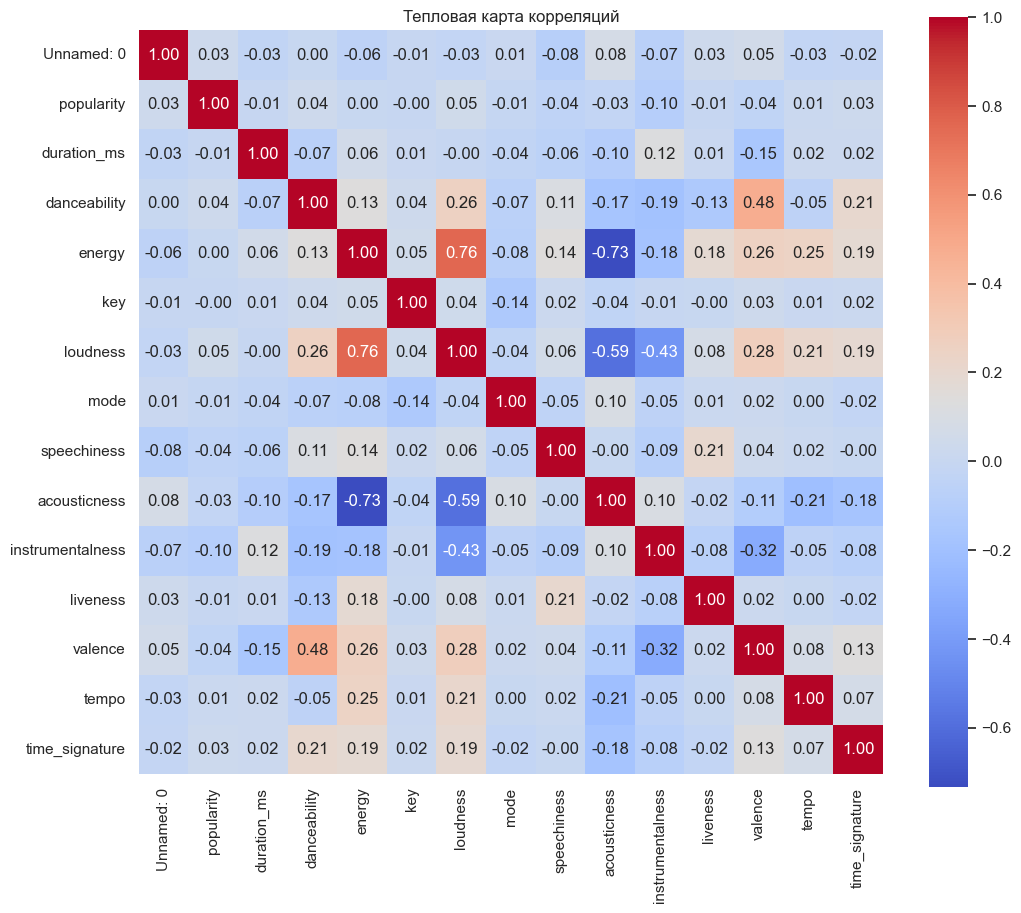

popularity          1.000000
loudness            0.050423
danceability        0.035448
Unnamed: 0          0.032142
time_signature      0.031073
tempo               0.013205
energy              0.001056
key                -0.003853
liveness           -0.005387
duration_ms        -0.007101
mode               -0.013931
acousticness       -0.025472
valence            -0.040534
speechiness        -0.044927
instrumentalness   -0.095139
Name: popularity, dtype: float64

In [6]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Тепловая карта корреляций')
plt.show()

popularity_correlation = correlation_matrix['popularity'].sort_values(ascending=False)
popularity_correlation

## Выводы к корр. анализу

<b>Корреляционный анализ показал следующие зависимости с популярностью треков:</b>

<b>Громкость (loudness)</b>: Имеет небольшую положительную корреляцию с популярностью (0.05). Это может указывать на то, что более громкие треки немного более популярны.

<b>Танцевальность (danceability)</b>: Также имеет небольшую положительную корреляцию (0.04), что может означать, что более танцевальные треки имеют тенденцию быть более популярными.

<b>Инструментальность (instrumentalness)</b>: Имеет небольшую отрицательную корреляцию (-0.10), что может указывать на то, что менее инструментальные треки более популярны.

<b>Другие факторы</b>: Остальные факторы, такие как темп, энергичность, валентность и продолжительность, имеют очень слабую корреляцию с популярностью, что может означать, что их влияние на популярность незначительно или требует более глубокого анализа.

## Визуализация зависимостей

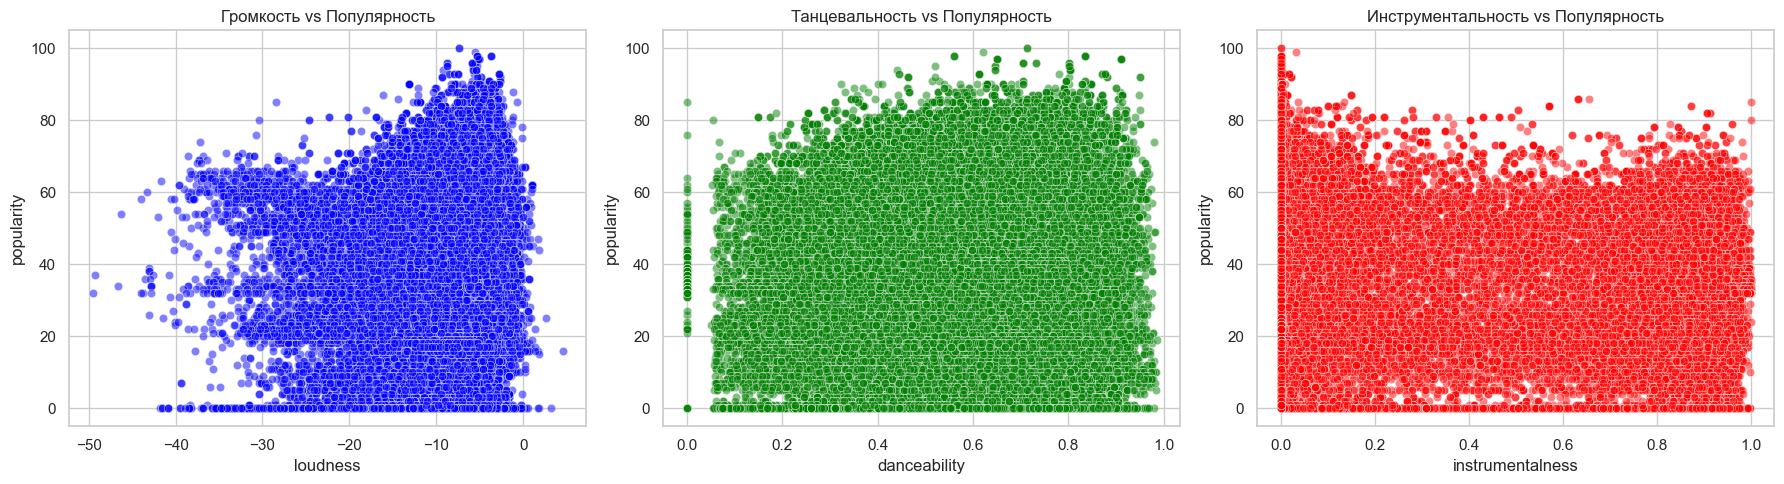

In [7]:
# Построение графиков рассеяния для числовых признаков с наибольшей корреляцией с популярностью
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# График рассеяния для громкости
sns.scatterplot(x='loudness', y='popularity', data=df, ax=axes[0], alpha=0.5, color='blue')
axes[0].set_title('Громкость vs Популярность')

# График рассеяния для танцевальности
sns.scatterplot(x='danceability', y='popularity', data=df, ax=axes[1], alpha=0.5, color='green')
axes[1].set_title('Танцевальность vs Популярность')

# График рассеяния для инструментальности
sns.scatterplot(x='instrumentalness', y='popularity', data=df, ax=axes[2], alpha=0.5, color='red')
axes[2].set_title('Инструментальность vs Популярность')

plt.tight_layout()
plt.show()

<h4><b>Графики рассеяния показывают следующие зависимости с популярностью:</b></h4>


<b>Громкость (loudness) vs Популярность:</b>

График показывает, что треки с более высокой громкостью имеют тенденцию к более высокой популярности. Однако, эта зависимость не является строгой, и есть много треков с низкой громкостью, которые также имеют высокую популярность.


<b>Танцевальность (danceability) vs Популярность:</b>

График показывает, что треки с более высокой танцевальностью имеют тенденцию к более высокой популярности. Однако, как и в случае с громкостью, эта зависимость не является строгой.


<b>Инструментальность (instrumentalness) vs Популярность:</b>

График показывает, что треки с более низкой инструментальностью имеют тенденцию к более высокой популярности. Это может означать, что треки с вокалом или более сложной аранжировкой более популярны.

## Анализ категориальных полей

C:\Users\Maksim Razhev\AppData\Local\Temp\ipykernel_1996\520323566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='track_genre', data=df, order=df['track_genre'].value_counts().iloc[:10].index, ax=axes[0], palette='viridis')
C:\Users\Maksim Razhev\AppData\Local\Temp\ipykernel_1996\520323566.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='artists', data=df, order=df['artists'].value_counts().iloc[:10].index, ax=axes[1], palette='viridis')


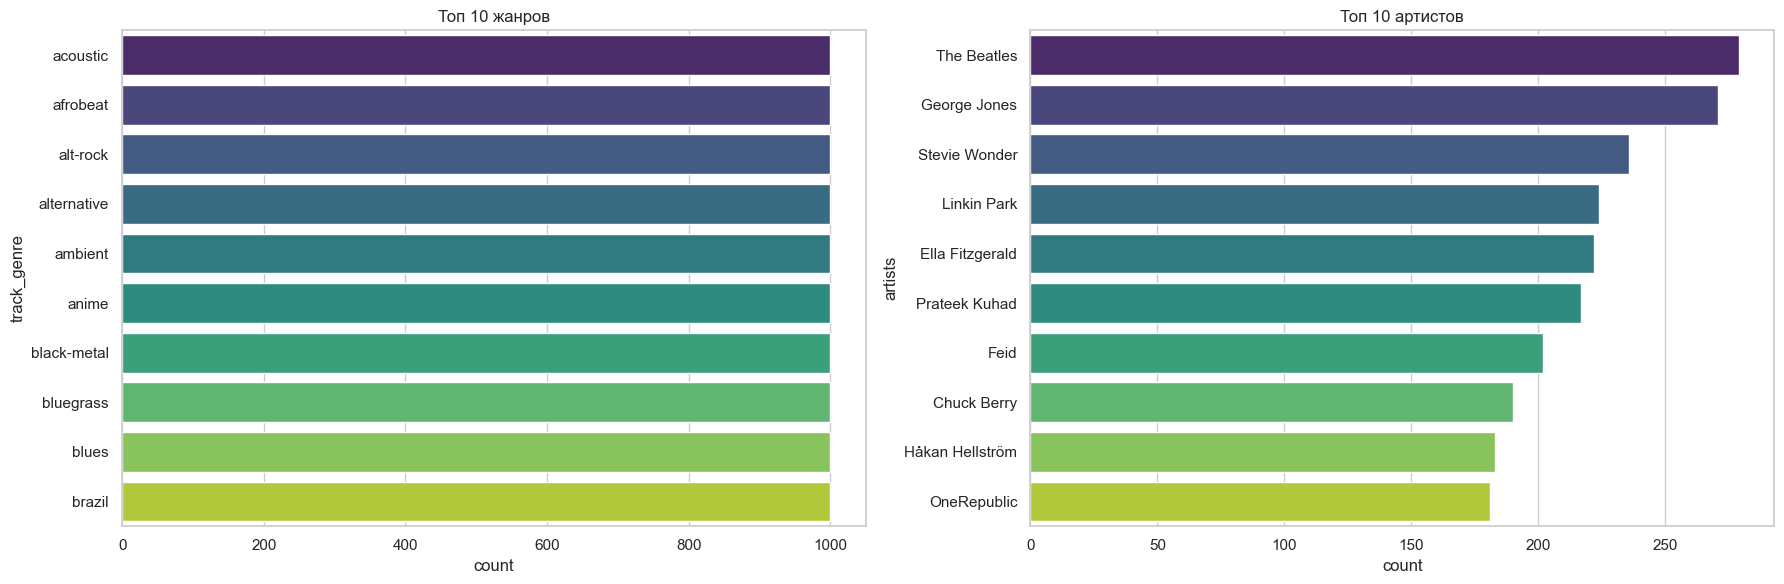

C:\Users\Maksim Razhev\AppData\Local\Temp\ipykernel_1996\520323566.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='track_genre', y='popularity', data=df, order=df['track_genre'].value_counts().iloc[:10].index, palette='viridis')


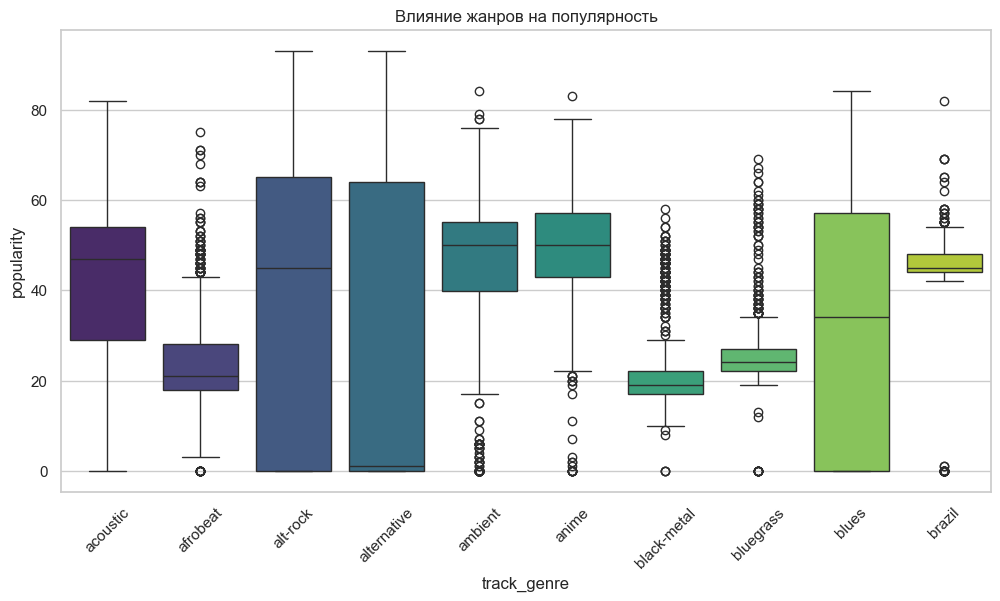

In [8]:
# Построение графиков распределения категориальных данных
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Распределение жанров
sns.countplot(y='track_genre', data=df, order=df['track_genre'].value_counts().iloc[:10].index, ax=axes[0], palette='viridis')
axes[0].set_title('Топ 10 жанров')

# Распределение артистов
sns.countplot(y='artists', data=df, order=df['artists'].value_counts().iloc[:10].index, ax=axes[1], palette='viridis')
axes[1].set_title('Топ 10 артистов')

plt.tight_layout()
plt.show()

# Влияние жанров на популярность
plt.figure(figsize=(12, 6))
sns.boxplot(x='track_genre', y='popularity', data=df, order=df['track_genre'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Влияние жанров на популярность')
plt.xticks(rotation=45)
plt.show()

## Топ 10 жанров

Судя по графику, в датасете равное количество треков из каждого жанра -> невозможно составить топ-10

## Топ 10 артистов:

Некоторые артисты имеют больше треков в датасете, что может указывать на их популярность или активность.

## Влияние жанров на популярность:

График показывает распределение популярности для различных жанров. Некоторые жанры имеют более высокую медианную популярность, что может указывать на их общую привлекательность для слушателей.

## Поле Explicit

C:\Users\Maksim Razhev\AppData\Local\Temp\ipykernel_1996\527985362.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='explicit', y='popularity', data=df, palette='viridis')


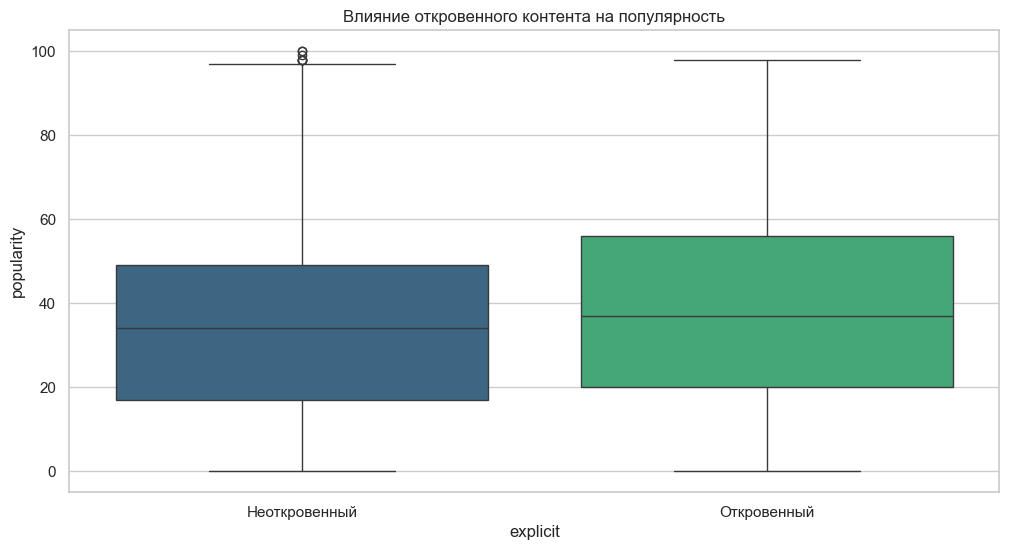

,count,mean,std,min,25%,50%,75%,max
explicit,,,,,,,,
False,104253.0,32.937891,22.083771,0.0,17.0,34.0,49.0,100.0
True,9747.0,36.454191,24.317510,0.0,20.0,37.0,56.0,98.0


In [9]:
# Анализ влияния откровенного контента на популярность
plt.figure(figsize=(12, 6))

# Построение графика распределения популярности для явного и неявного контента
sns.boxplot(x='explicit', y='popularity', data=df, palette='viridis')
plt.title('Влияние откровенного контента на популярность')
plt.xticks(ticks=[0, 1], labels=['Неоткровенный', 'Откровенный'])
plt.show()

# Статистический анализ влияния явного контента на популярность
explicit_stats = df.groupby('explicit')['popularity'].describe()
explicit_stats


График показывает распределение популярности для треков с откровенным и неоткровенным контентом.
Треки с откровенным контентом имеют немного более высокую медианную популярность по сравнению с треками без откровенным контента.


Средняя популярность треков с откровенным контентом составляет около 36.45, в то время как для треков без откровенного контента она составляет около 32.94.

Стандартное отклонение популярности для треков с откровенным контентом немного выше, что указывает на большую вариативность в популярности.
Медианная популярность для треков с откровенным контентом также выше (34 против 32).

# Создание признаков и Feature Importance

Для начала заново взглянем на матрицу корреляции. На этот раз будем смотреть как коррелируют между собой признаки.

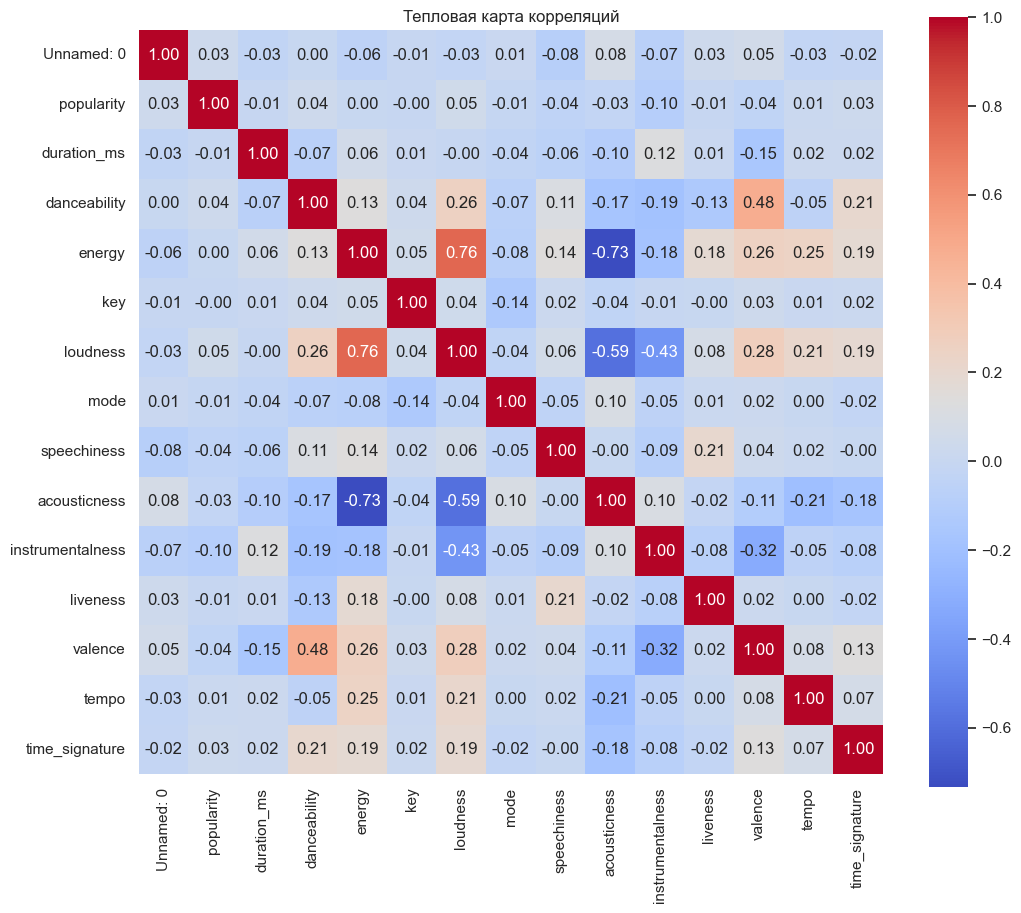

popularity          1.000000
loudness            0.050423
danceability        0.035448
Unnamed: 0          0.032142
time_signature      0.031073
tempo               0.013205
energy              0.001056
key                -0.003853
liveness           -0.005387
duration_ms        -0.007101
mode               -0.013931
acousticness       -0.025472
valence            -0.040534
speechiness        -0.044927
instrumentalness   -0.095139
Name: popularity, dtype: float64

In [10]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Тепловая карта корреляций')
plt.show()
popularity_correlation = correlation_matrix['popularity'].sort_values(ascending=False)
popularity_correlation

Будем рассматривать поля, значение связи которых больше чем слабая. (Таблица Чеддока). 
Такие поля: 
- danceability & valence (+)
- energy & loudness (+)
- energy & acousticness (-)
- loudness & acousticness (-)
- loudness & instrumentalness (-)
- instrumentalness & valence (-)


Добавим поля

In [11]:
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [12]:
mean_vals = {
    'danceability': df['danceability'].mean(),
    'valence': df['valence'].mean(),
    'energy': df['energy'].mean(),
    'loudness': df['loudness'].mean(),
    'acousticness': df['acousticness'].mean(),
    'instrumentalness': df['instrumentalness'].mean()
}

df['DV'] = ((df['danceability'] >= mean_vals['danceability']) & 
            (df['valence'] >= mean_vals['valence'])).astype(int)

df['EL'] = ((df['energy'] >= mean_vals['energy']) & 
            (df['loudness'] >= mean_vals['loudness'])).astype(int)

df['EA'] = (((df['energy'] >= mean_vals['energy']) & (df['acousticness'] < mean_vals['acousticness'])) |
            ((df['energy'] < mean_vals['energy']) & (df['acousticness'] >= mean_vals['acousticness']))).astype(int)

df['LA'] = (((df['loudness'] >= mean_vals['loudness']) & (df['acousticness'] < mean_vals['acousticness'])) |
            ((df['loudness'] < mean_vals['loudness']) & (df['acousticness'] >= mean_vals['acousticness']))).astype(int)

df['LI'] = (((df['loudness'] >= mean_vals['loudness']) & (df['instrumentalness'] < mean_vals['instrumentalness'])) |
            ((df['loudness'] < mean_vals['loudness']) & (df['instrumentalness'] >= mean_vals['instrumentalness']))).astype(int)

df['IV'] = (((df['valence'] >= mean_vals['valence']) & (df['instrumentalness'] < mean_vals['instrumentalness'])) |
            ((df['valence'] < mean_vals['valence']) & (df['instrumentalness'] >= mean_vals['instrumentalness']))).astype(int)

df.head(5)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,valence,tempo,time_signature,track_genre,DV,EL,EA,LA,LI,IV
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.715,87.917,4,acoustic,1,0,0,1,1,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.267,77.489,4,acoustic,0,0,1,1,0,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.120,76.332,4,acoustic,0,0,0,0,0,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.143,181.740,3,acoustic,0,0,1,1,0,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.167,119.949,4,acoustic,0,0,1,1,0,0


Также стоит добавить колонки, которые достаточно хорошо коррелируют с целевой переменной. Это признаки:
- loudness (+)
- danceability (+)
- time_signature (+)
- instrumentalness (-)
- speechiness (-)

Отметим, что изначальные признаки очень слабо коррелируют с таргетом, поэтому были отобраны максимально сильно коррелирующие. 

Создадим такие функции, чтобы рассчитывать популярность за едницу конкретного признака.

#### Громкость

In [13]:
print('Громкость меняется от ' +  str(df['loudness'].min())+ ' до ' + str(df['loudness'].max()))

Громкость меняется от -49.531 до 4.532


Исходя из этого слегка видоизменим данный признак: тем более отрицательное значение громкости может повлиять на вычисления.

In [14]:
df['other_loudness'] = df['loudness'].apply(lambda x: round((round(x, 1) - 4.5)/4.5, 0) + 12)

Тогда зависимость популярности от уровня громкости:

In [15]:
df['loudness_pop'] = df['popularity'] / df['other_loudness']

#### Танцевальность

In [16]:
print('Танцевальность меняется от ' +  str(df['danceability'].min())+ ' до ' + str(df['danceability'].max()))

Танцевальность меняется от 0.0 до 0.985


In [17]:
df['danceability_pop'] = df['popularity'] / (df['danceability']*100)

#### Тактовый размер

In [18]:
print('Тактовый размер меняется от ' +  str(df['time_signature'].min())+ ' до ' + str(df['time_signature'].max()))

Тактовый размер меняется от 0 до 5


In [19]:
df['time_signature_pop'] = df['popularity'] / df['time_signature']

#### Инструментальность

In [20]:
print('Инстурментальность меняется от ' +  str(df['instrumentalness'].min())+ ' до ' + str(df['instrumentalness'].max()))

Инстурментальность меняется от 0.0 до 1.0


In [21]:
df['instrumentalness_pop'] = df['popularity'] * df['instrumentalness']

#### Красноречивость

In [22]:
print('Красноречивость меняется от ' +  str(df['speechiness'].min())+ ' до ' + str(df['speechiness'].max()))

Красноречивость меняется от 0.0 до 0.965


In [23]:
df['speechiness_pop'] = df['popularity'] * df['speechiness']

### Корреляция новых признаков

In [24]:
copy_df = df.copy()
copy_df.drop(['key', 'mode', 'liveness', 'tempo', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'loudness', 'duration_ms', 'danceability'], axis=1, inplace=True)

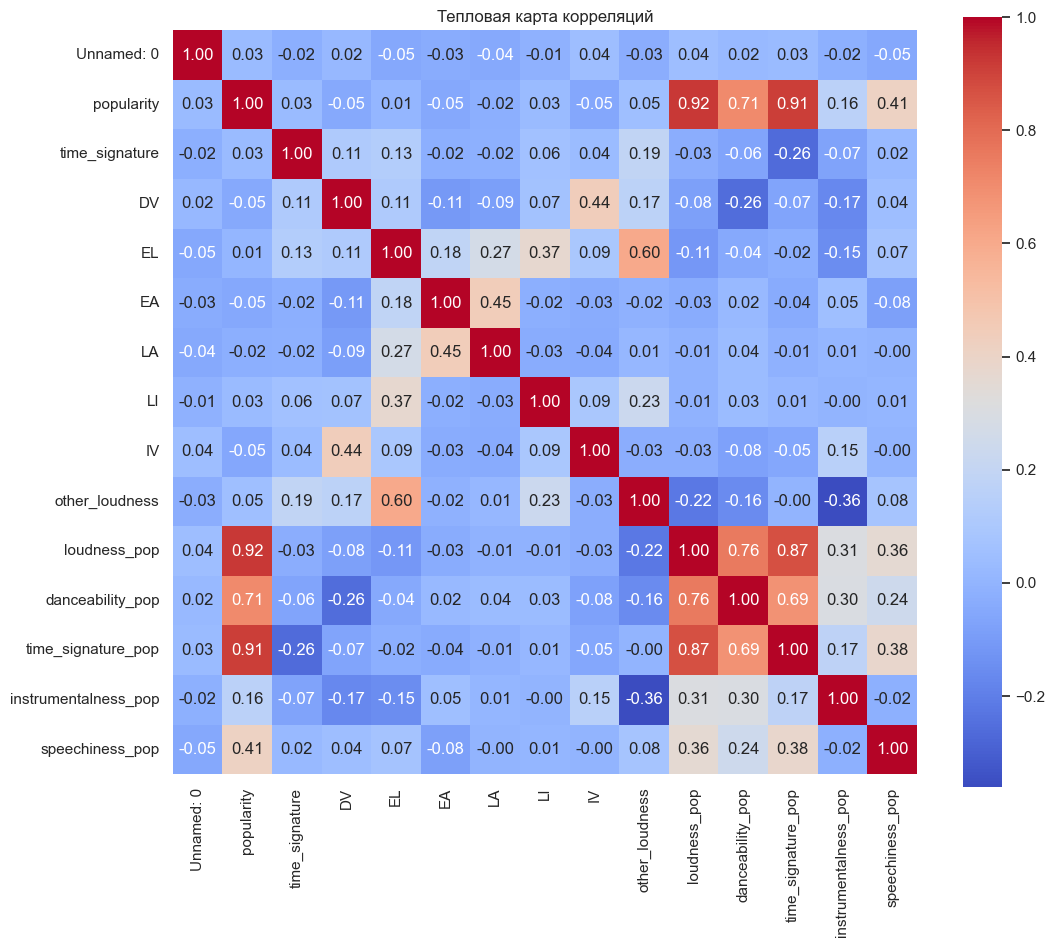

popularity              1.000000
loudness_pop            0.924274
time_signature_pop      0.913274
danceability_pop        0.708123
speechiness_pop         0.413692
instrumentalness_pop    0.161423
other_loudness          0.049272
Unnamed: 0              0.032142
time_signature          0.031073
LI                      0.028715
EL                      0.008105
LA                     -0.022433
DV                     -0.045389
EA                     -0.049894
IV                     -0.054573
Name: popularity, dtype: float64

In [25]:
numeric_data = copy_df.select_dtypes(include=['int', 'int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Тепловая карта корреляций')
plt.show()
popularity_correlation = correlation_matrix['popularity'].sort_values(ascending=False)
popularity_correlation

#### Промежуточный вывод по корреляции

Видим, что производные от таргета имеют наиболее высокие значения корреляции, однако сравнивать по ним будет некорректно. Можно также заметить, что скомбинированные нами новые признаки значительно увеличились в значениях корреляции относительно остальных признаков, которые были даны нам до этого. Поэтому попробуем также добавить новые поля, которые являются производными от тех признаков, которые до этого хорошо коррелировали.

- loudness
- danceability 
- time_signature
- valence 
- speechiness
- instrumentalness

In [26]:
df.drop(['Unnamed: 0', 'track_genre', 'loudness_pop', 'danceability_pop', 'time_signature_pop', 'instrumentalness_pop', 'speechiness_pop'], axis=1, inplace=True)

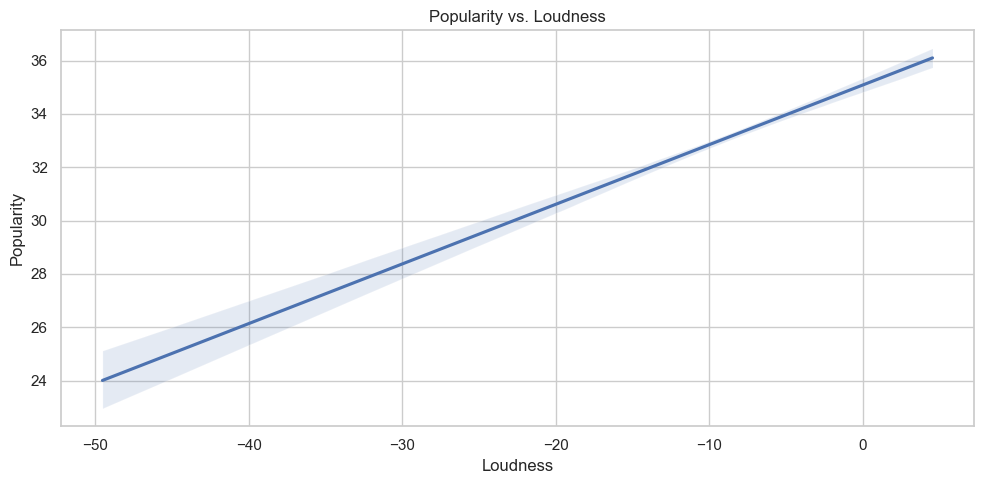

In [27]:
plt.figure(figsize=(10,5))
sns.regplot(x='loudness', y='popularity', data=df, scatter=False)
plt.title('Popularity vs. Loudness')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

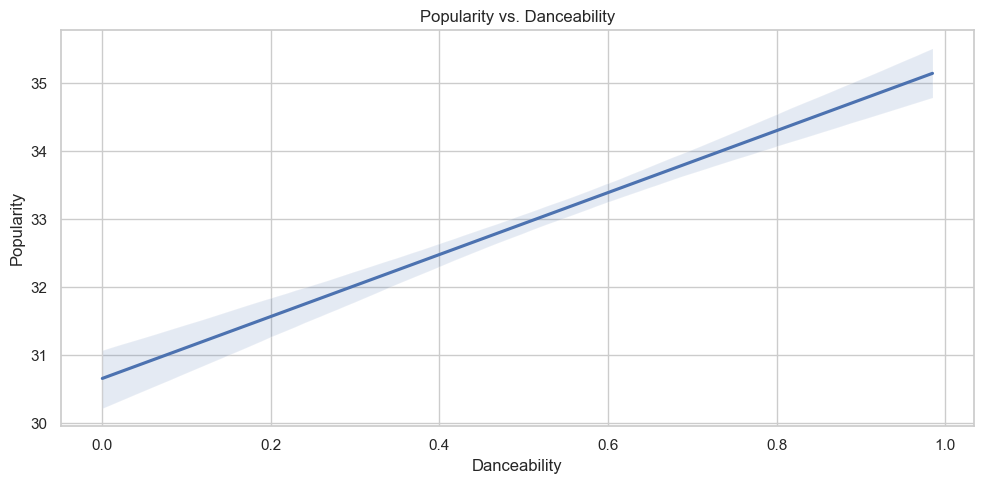

In [28]:
plt.figure(figsize=(10,5))
sns.regplot(x='danceability', y='popularity', data=df, scatter=False)
plt.title('Popularity vs. Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

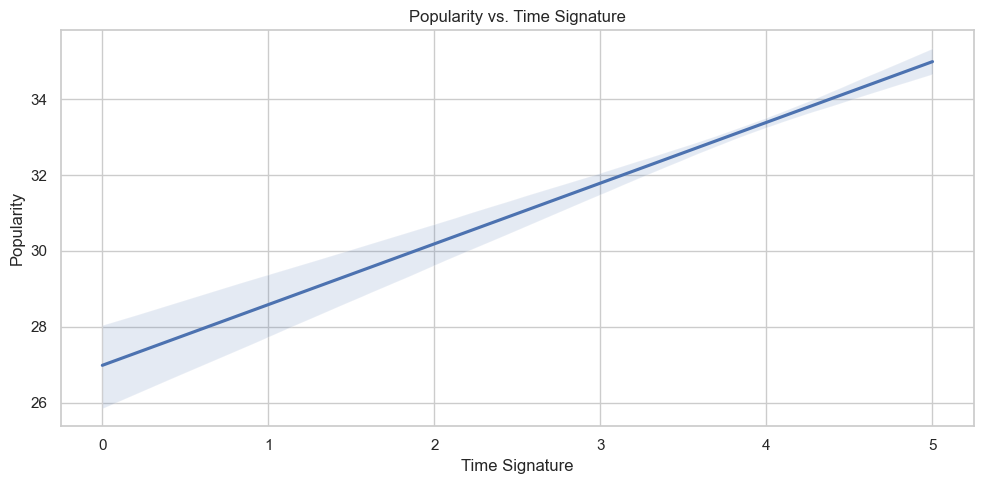

In [29]:
plt.figure(figsize=(10,5))
sns.regplot(x='time_signature', y='popularity', data=df, scatter=False)
plt.title('Popularity vs. Time Signature')
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

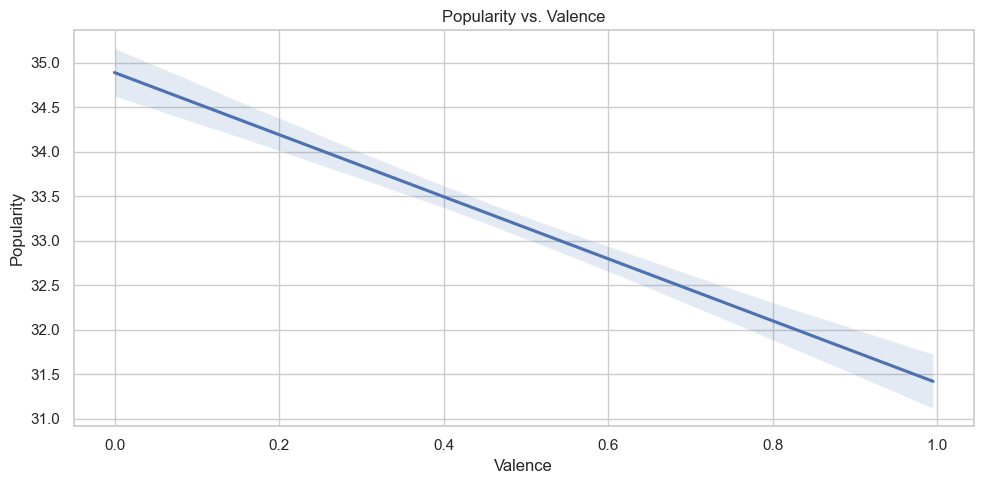

In [30]:
plt.figure(figsize=(10,5))
sns.regplot(x='valence', y='popularity', data=df, scatter=False)
plt.title('Popularity vs. Valence')
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

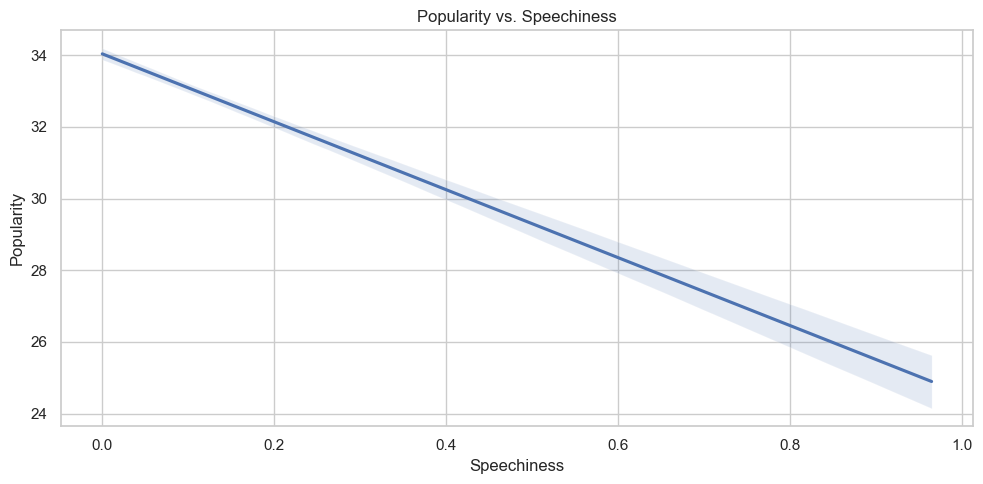

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(x='speechiness', y='popularity', data=df, scatter=False)
plt.title('Popularity vs. Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

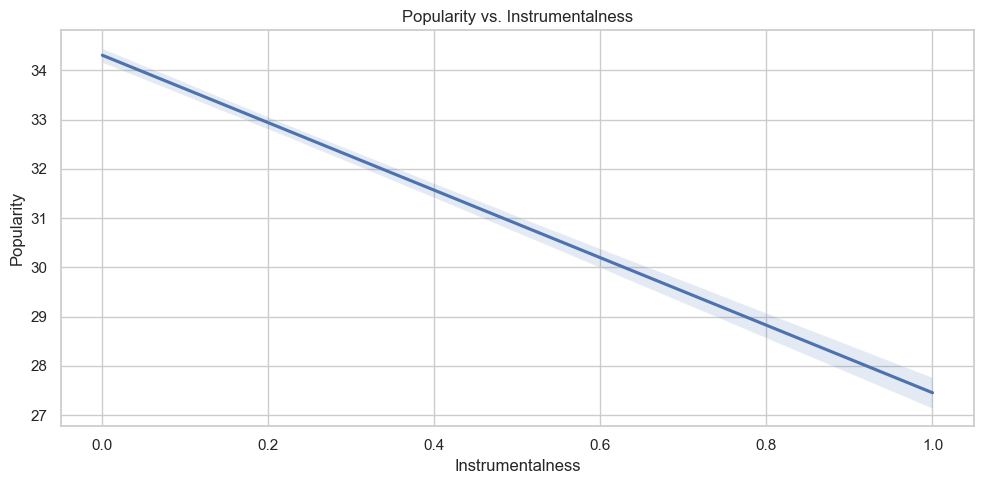

In [32]:
plt.figure(figsize=(10,5))
sns.regplot(x='instrumentalness', y='popularity', data=df, scatter=False)
plt.title('Popularity vs. Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Вывод: мы убедились, что первоначальные признаки, которые достаточно хорошо коррелировали, действительно имеют связь с таргетом. Имеет смысл создать новые признаки для них. 

In [33]:
df['bool_loudness'] = df['loudness'].apply(lambda x: 1 if x >= stats_summary.loudness['mean'] else 0)
df['bool_danceability'] = df['danceability'].apply(lambda x: 1 if x >= stats_summary.danceability['mean'] else 0)
df['bool_time_signature'] = df['time_signature'].apply(lambda x: 1 if x >= stats_summary.time_signature['mean'] else 0)
df['bool_valence'] = df['valence'].apply(lambda x: 1 if x < stats_summary.valence['mean'] else 0)
df['bool_speechiness'] = df['speechiness'].apply(lambda x: 1 if x < stats_summary.speechiness['mean'] else 0)
df['bool_instrumentalness'] = df['instrumentalness'].apply(lambda x: 1 if x < stats_summary.instrumentalness['mean'] else 0)

In [34]:
copy_df = df.copy()
copy_df.drop(['key', 'mode', 'liveness', 'tempo', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'loudness', 'duration_ms', 'danceability'], axis=1, inplace=True)

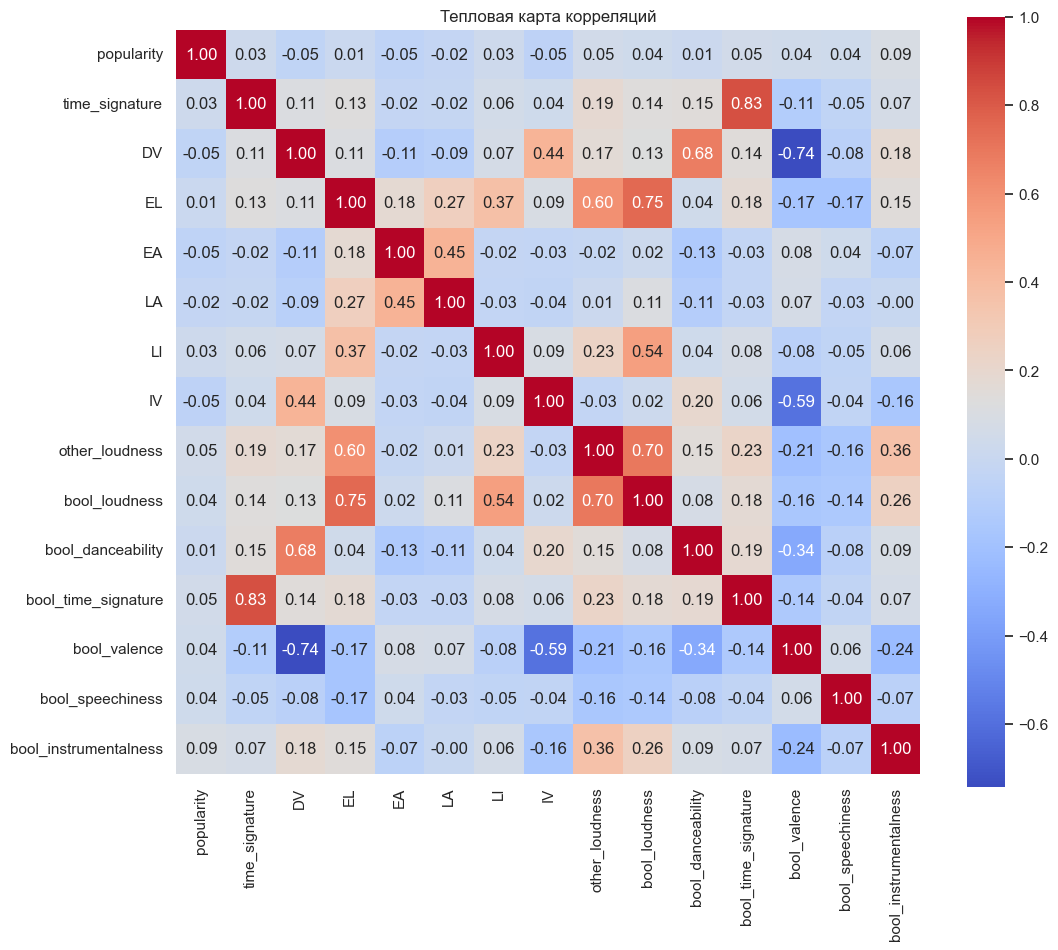

popularity               1.000000
bool_instrumentalness    0.090321
bool_time_signature      0.049385
other_loudness           0.049272
bool_valence             0.044697
bool_speechiness         0.038128
bool_loudness            0.037359
time_signature           0.031073
LI                       0.028715
bool_danceability        0.013606
EL                       0.008105
LA                      -0.022433
DV                      -0.045389
EA                      -0.049894
IV                      -0.054573
Name: popularity, dtype: float64

In [35]:
numeric_data = copy_df.select_dtypes(include=['int', 'int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Тепловая карта корреляций')
plt.show()
popularity_correlation = correlation_matrix['popularity'].sort_values(ascending=False)
popularity_correlation

Вывод: созданные нами новые признаки в отличии от изначальных полей коррелируют гораздо сильнее с целевой переменной.

## Обучение простой модели

Для начала посмотрим какие типы данных лежат в датафрейме.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   track_id               114000 non-null  object 
 1   artists                113999 non-null  object 
 2   album_name             113999 non-null  object 
 3   track_name             113999 non-null  object 
 4   popularity             114000 non-null  int64  
 5   duration_ms            114000 non-null  int64  
 6   explicit               114000 non-null  bool   
 7   danceability           114000 non-null  float64
 8   energy                 114000 non-null  float64
 9   key                    114000 non-null  int64  
 10  loudness               114000 non-null  float64
 11  mode                   114000 non-null  int64  
 12  speechiness            114000 non-null  float64
 13  acousticness           114000 non-null  float64
 14  instrumentalness       114000 non-nu

Тип object недопустим в обучении модели и хорошо бы было их закодировать. Используем LabelEncoder для этого.

In [37]:
from sklearn.preprocessing import LabelEncoder

norm_df = df.copy()
object_cols = norm_df.select_dtypes(include=['object']).columns
encoders = dict()
for col in object_cols:
    encoders[col] = LabelEncoder()
    norm_df[col] = encoders[col].fit_transform(norm_df[col])

Перед тем как начать обучать простую модель разделим датафрейм на две части: все признаки кроме таргета, только таргет. Также разделим их на обучающую и тестовую выборки.

In [38]:
from sklearn.model_selection import train_test_split

X = norm_df.drop(['popularity'], axis=1)
y = norm_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

В качестве простой модели используем LinearRegression, а данные стандартизируем при помощи StandardScaler.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = root_mean_squared_error(y_test, y_pred)
print(score)

21.875251646757707


## Feature Importance

Теперь можем проводить оценку важности признаков. Для этого используем Permutation Importance – это индекс важности перемешанных компонент для оценки важности каждого признака.

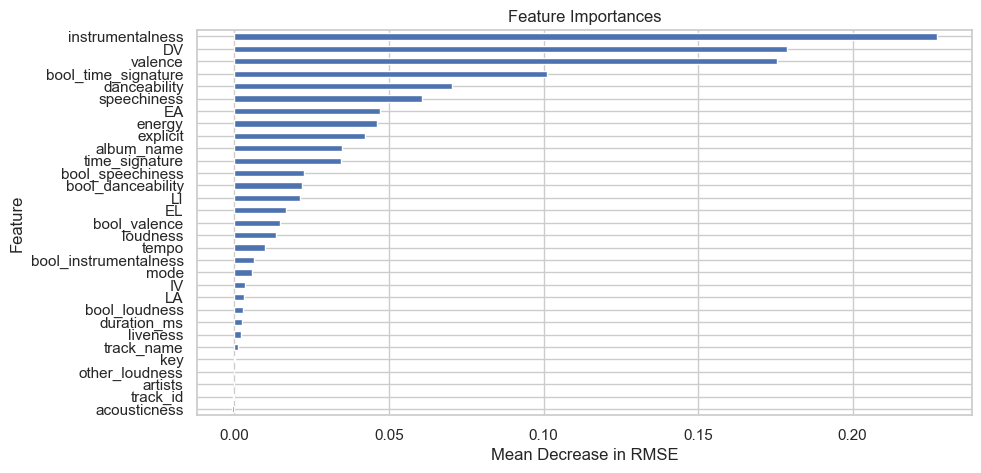

In [40]:
from sklearn.inspection import permutation_importance

importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error')

importances_series = pd.Series(importances.importances_mean, index=X.columns)
importances_series.sort_values().plot(kind='barh', figsize=(10, 5))
plt.title('Feature Importances')
plt.xlabel('Mean Decrease in RMSE')
plt.ylabel('Feature')
plt.show()

Можно увидеть, что созданные нами признаки находятся на весьма высоких позициях, также есть и изначальные признаки, которые сильно влияют. Попробуем избавиться от признаков, которые влияют очень мало: все, что ниже моды.

In [41]:
final_norm_df = norm_df.drop(['acousticness', 'track_id', 'artists', 'other_loudness', 'key', 'track_name', 'liveness', 'duration_ms', 'bool_loudness'], axis=1)

X = final_norm_df.drop(['popularity'], axis=1)
y = final_norm_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(root_mean_squared_error(y_test, y_pred))

21.873883317867588


Методом подбора выявили, что наличие в результирующем датафрейме колонок IV и LA сильно снижает значение коэффициента ошибки. (21.874726866495124, если их выбросить)

## Вывод

В ходе своей работы, с помощью создания новых признаков, оценки их значимости и обучения простой модели я выявил, что если изначальные данные не сильно коррелировали с таргетом, то и от созданных признаков ожидать того же не стоит. Однако стоит отметить, что все-таки их коэффициенты корреляции могут быть выше, чем у их основ-значений. Так что стоит продолжать работать с тем, что получилось, тем более, когда обучение простой модели на изначальном фрейме и на том, где мы отбросили значения с очень низким уровнем важности, показало неплохой результат уменьшения коэффициента ошибки.

# Эксперименты с моделями машинного обучения

В предыдущей части работы мы рассмотрели Линейную Регрессию и получили результат RMSE = 21.873883317867588  
Поэксперементиурем с моделями Decision Tree, Random Forest, MLP, Gradient Boosting Regressor, XGBoost.  
Ради интереса рассмотрим две модификации градиентного бустинга.

## Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

print(root_mean_squared_error(y_test, dt_y_pred))

19.843910888439336


## Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

print(root_mean_squared_error(y_test, rf_y_pred))

13.904618868351971


## MLP Regressor

In [45]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_y_pred = mlp_model.predict(X_test)

print(root_mean_squared_error(y_test, mlp_y_pred))

21.04795578022158


## Gradient Boosting Regressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

print(root_mean_squared_error(y_test, gb_y_pred))

20.53557443791331


## XGBoost

In [47]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

print(root_mean_squared_error(y_test, xgb_y_pred))

18.274141311645508


Мы рассмотрели 6 моделей и наилучший результат показала модель Random Forest с результатом RMSE = 13.904618868351971   
Сделаем кросс-валидацию модели.

In [49]:
from sklearn.model_selection import cross_val_score


rf_model_val = RandomForestRegressor(n_estimators=100, random_state=42)
neg_mse_scores = cross_val_score(rf_model_val, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -neg_mse_scores

print("RMSE по фолдам:", rmse_scores)
print("Среднее RMSE:", np.mean(rmse_scores))

RMSE по фолдам: [17.29807562 14.76837208 18.39881827 16.03647385 16.29753381]
Среднее RMSE: 16.559854727160452


# Итоговый вывод по работе

В рамках выполнения данной работы нашей командой была проведена тщательная комплексная аналитическая работа над датасетом музыкального сервиса Spotify, включающая этапы исследовательского анализа данных, определения важности признаков, построения моделей машинного обучения и оценки качества наилучшей из них с помощью кросс-валидации.

На первом этапе был осуществлен сбор и первичная обработка данных. В процессе анализа мы проверили структуру данных, определили типы признаков и выявили пропущенные значения. Далее мы вычислили агрегатные значения для каждого признака. Для лучшего представления значений каждого признака были построены визуализации распределений: популярности, танцевальности, энергичности, громкости, продолжительности и темпа треков. После этого приступили к корреляционному анализу, который показал, что признаки не очень сильно коррелируют с таргетом, однако среди них были и те, которые коррелировали сильнее остальных: громкость, танцевальность и инструментальность. Анализ категориальных полей тем временем особо ничего не дал. 

Второй этап включал в себя создание признаков и их дальнейший анализ важности. Используя таблицу Чеддока из наиболее коррелирующих полей были выведены новые признаки, которые впоследствии участвовали в корреляционном анализе с таргетом. Новые признаки не сильно, но все-таки подняли коэффициент корреляции с таргетом, значит имело смысл их создавать, и с этими данными приступили к обучению простой модели, в качестве которой была выбрана простейшая линейная регрессия. На ее основе выбрали наиболее важные признаки, а те, что имели очень маленький коэффициент важности, убрали из итогового датасета. Так был создан результирующий датасет для обучения остальных моделей.

Эксперименты с моделями машинного обучения – это третий этап нашей работы, и на ней мы в основном рассмотрели ансамбли и нейронную сеть. По итогам их обучения и коэффициенту квадратного корня среднеквадратической ошибки было выявлено, что лучшей моделью оказалась регрессия случайного леса. Для нее мы провели кросс-валидацию на 5 фолдах и выяснили, что средний коэффициент ошибки примерно 16.56, в то время как на обучении она показала приблизительно 13.91.

В результате выполнения всех этапов была достигнута основная цель нашей работы – анализ данных и машинное обучение для задачи регрессии. Полученные знания и навыки применимы в реальных задачах. Данная работа поспособствовала закреплению имеющихся знаний в области работы с данными, визуализации, подготовки результирующего датасета и построения моделей машинного обучения.